In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-shopping-latest-trends-dataset/shopping_trends.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
df = pd.read_csv("/kaggle/input/customer-shopping-latest-trends-dataset/shopping_trends.csv")

In [4]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [6]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [7]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [8]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


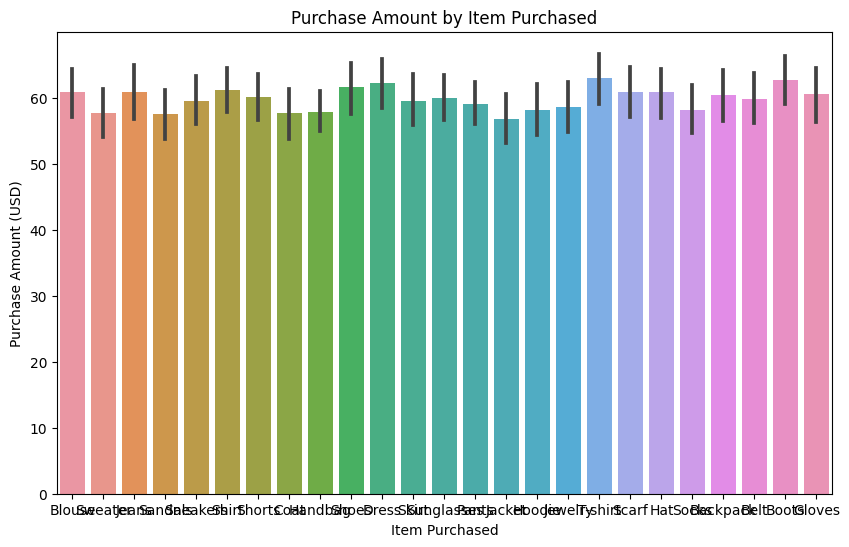

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Purchased', y='Purchase Amount (USD)', data=df)
plt.ticklabel_format(style='plain', axis='y')  # Remove scientific notation for Y-axis
plt.title("Purchase Amount by Item Purchased")
plt.show()


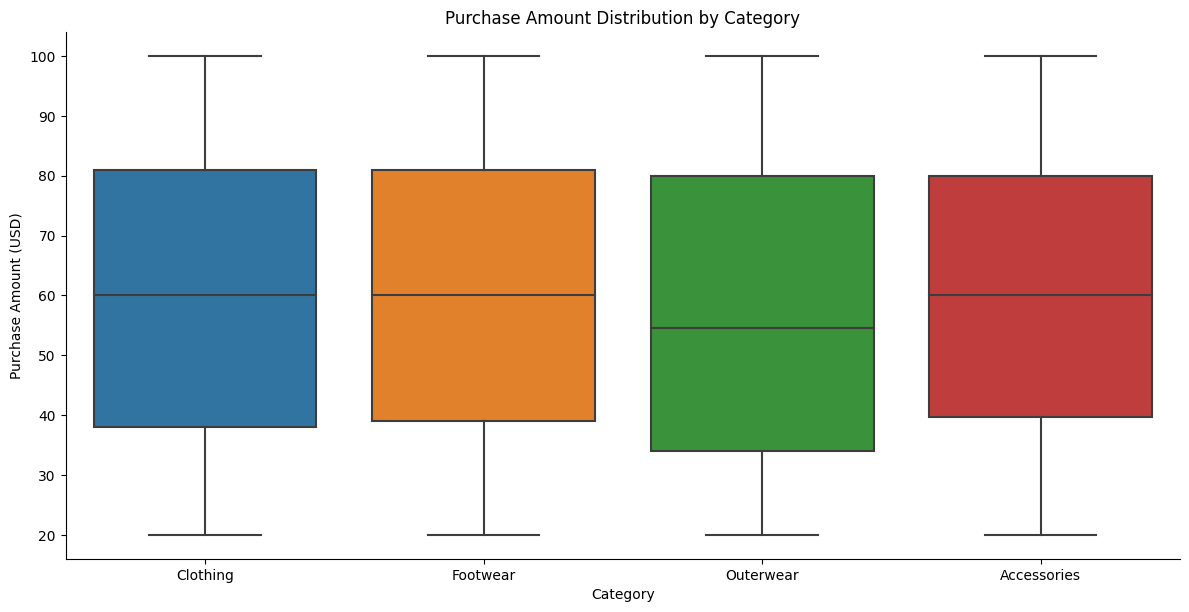

In [10]:
sns.catplot(data=df, x='Category', y='Purchase Amount (USD)', kind='box', height=6, aspect=2)
plt.title("Purchase Amount Distribution by Category")
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


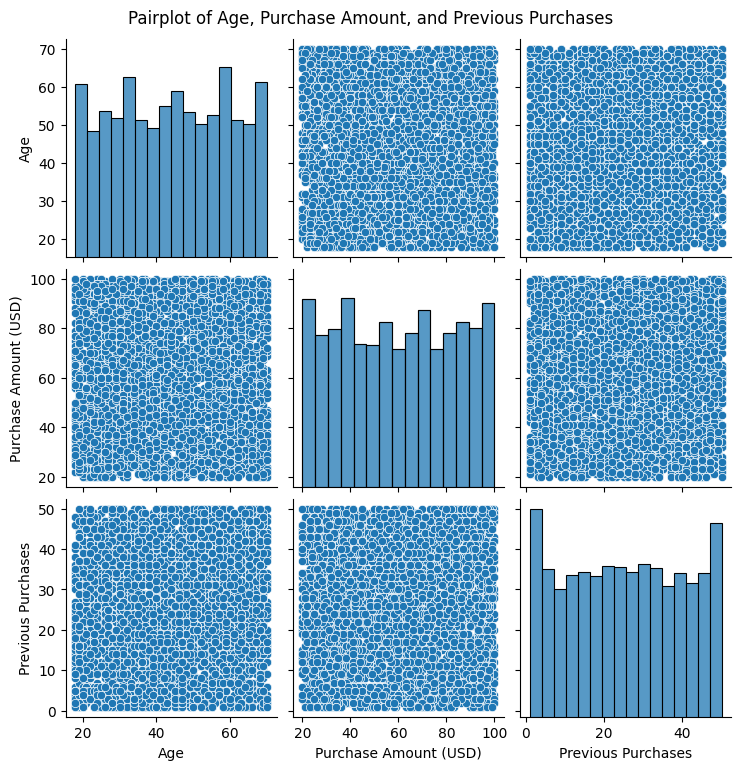

In [11]:
sns.pairplot(df[['Age', 'Purchase Amount (USD)', 'Previous Purchases']])
plt.suptitle('Pairplot of Age, Purchase Amount, and Previous Purchases', y=1.02)
plt.show()


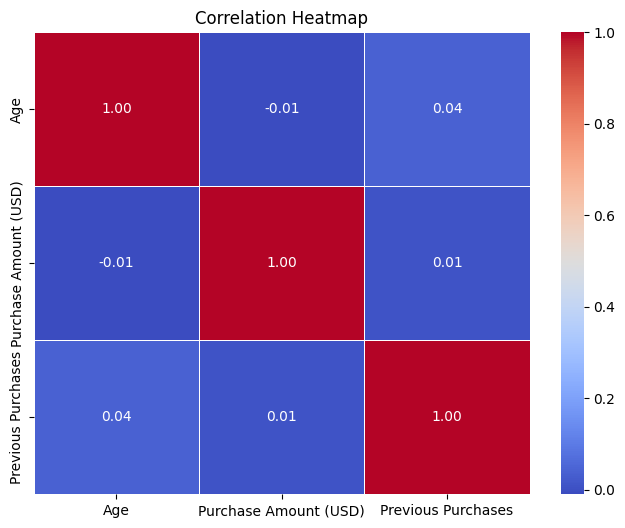

In [12]:
# Correlation heatmap of numerical data
corr = df[['Age', 'Purchase Amount (USD)', 'Previous Purchases']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


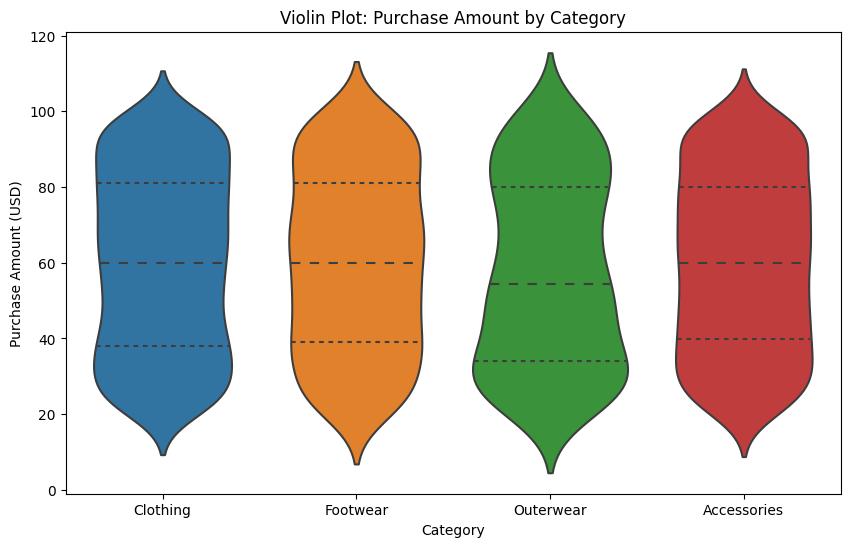

In [13]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Category', y='Purchase Amount (USD)', data=df, inner='quart')
plt.title("Violin Plot: Purchase Amount by Category")
plt.show()


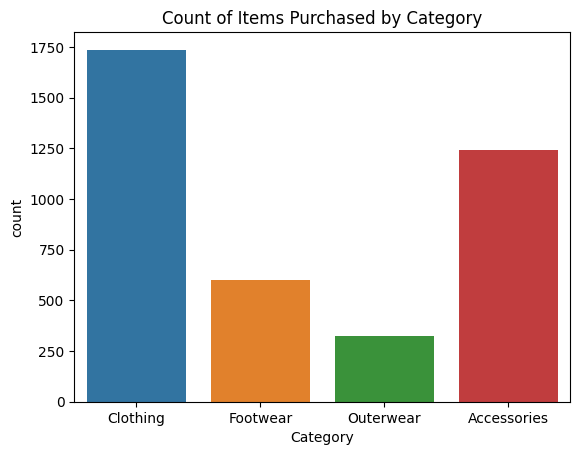

In [14]:
sns.countplot(x='Category', data=df)
plt.title('Count of Items Purchased by Category')
plt.show()


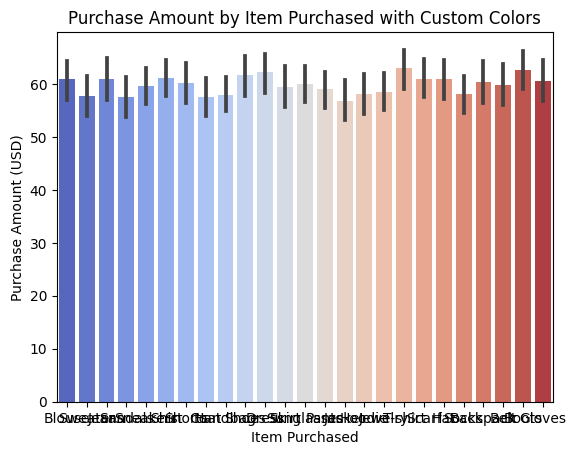

In [15]:
sns.barplot(x='Item Purchased', y='Purchase Amount (USD)', data=df, palette='coolwarm')
plt.title('Purchase Amount by Item Purchased with Custom Colors')
plt.show()


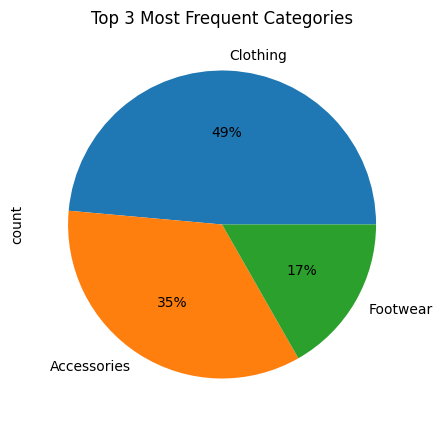

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming the dataset is already loaded into the 'df' DataFrame
# Get the top 3 most frequent categories in the 'Category' column
df['Category'].value_counts()[:3].plot.pie(figsize=(5, 5), autopct='%1.0f%%')

# Adding title and customizing the plot
plt.title("Top 3 Most Frequent Categories")
plt.xticks(rotation=90)

# Show the plot
plt.show()


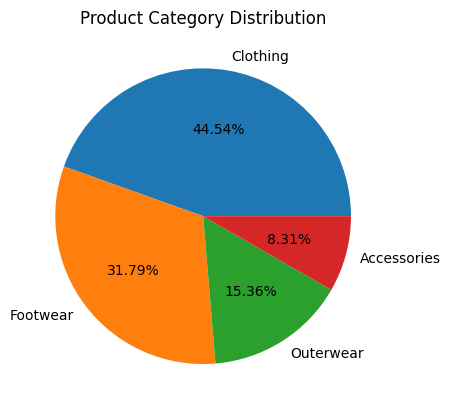

In [17]:
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded into the 'df' DataFrame
plt.pie(df['Category'].value_counts(), labels=df['Category'].unique(), autopct='%1.2f%%')

# Adding a title to the pie chart
plt.title("Product Category Distribution")

# Display the pie chart
plt.show()


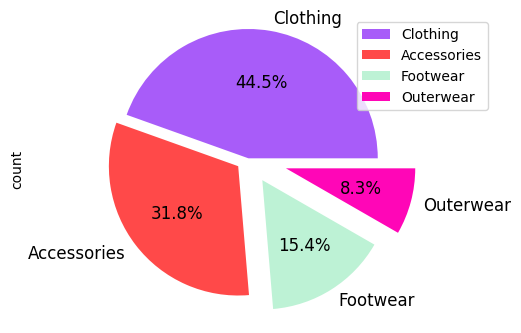

In [18]:
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded into the 'df' DataFrame
plt.figure(figsize=(6, 4))

# Count the occurrences of each unique value in the 'Category' column
counts = df['Category'].value_counts()

# Define the 'explode' to offset each wedge in the pie chart (for visualization effect)
explode = (0, 0.1, 0.2, 0.3)  # Adjust based on the number of unique categories

# Define a custom color palette for the pie chart
colors = ['#A85CF9', '#FF4949', '#BDF2D5', '#FF06B7', '#4B7BE5', '#FF5D5D', '#FAC213', '#37E2D5', '#6D8B74', '#E9D5CA']

# Create the pie chart
counts.plot(kind='pie', fontsize=12, colors=colors, explode=explode, autopct='%1.1f%%')

# Make sure the pie chart is circular
plt.axis('equal')

# Add a legend
plt.legend(labels=counts.index, loc='best')

# Show the pie chart
plt.show()


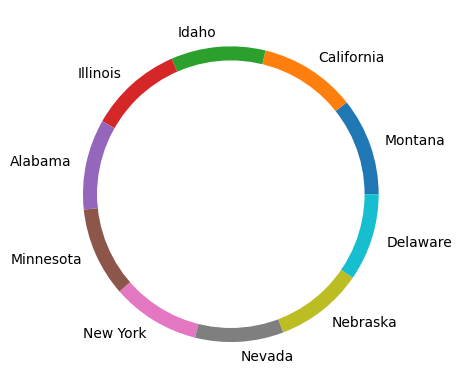

In [19]:
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded into the 'df' DataFrame
my_circle = plt.Circle((0, 0), 0.9, color='white')

# Count the occurrences of each unique value in the 'Location' column
plt.pie(df['Location'].value_counts()[:10].values, 
        labels=df['Location'].value_counts()[:10].index)

# Get the current figure and add the circle to it
p = plt.gcf()
p.gca().add_artist(my_circle)

# Display the pie chart
plt.show()


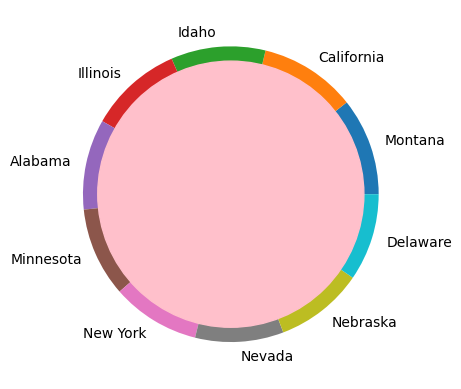

In [20]:
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded into the 'df' DataFrame
my_circle = plt.Circle((0, 0), 0.9, color='pink')

# Count the occurrences of each unique value in the 'Location' column
plt.pie(df['Location'].value_counts()[:10].values, 
        labels=df['Location'].value_counts()[:10].index)

# Get the current figure and add the circle to it
p = plt.gcf()
p.gca().add_artist(my_circle)

# Display the pie chart
plt.show()


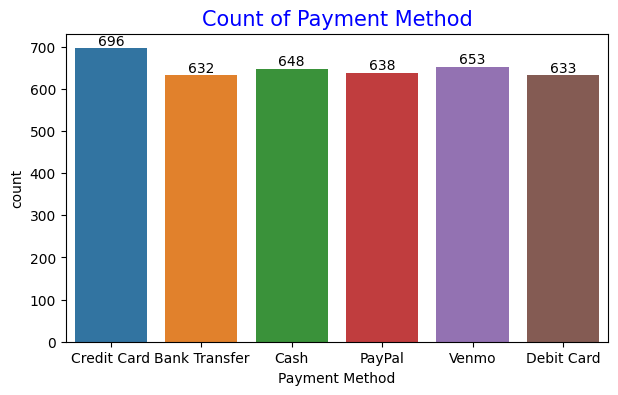

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is loaded into 'df'
plt.figure(figsize=(7, 4))

# Create the countplot for the 'Payment Method' column
ax = sns.countplot(x=df['Payment Method'])

# Add labels on top of the bars
for bars in ax.containers:
    ax.bar_label(bars)

# Set the title and other visual settings
plt.title("Count of Payment Method", fontsize=15, color='Blue')
plt.show()


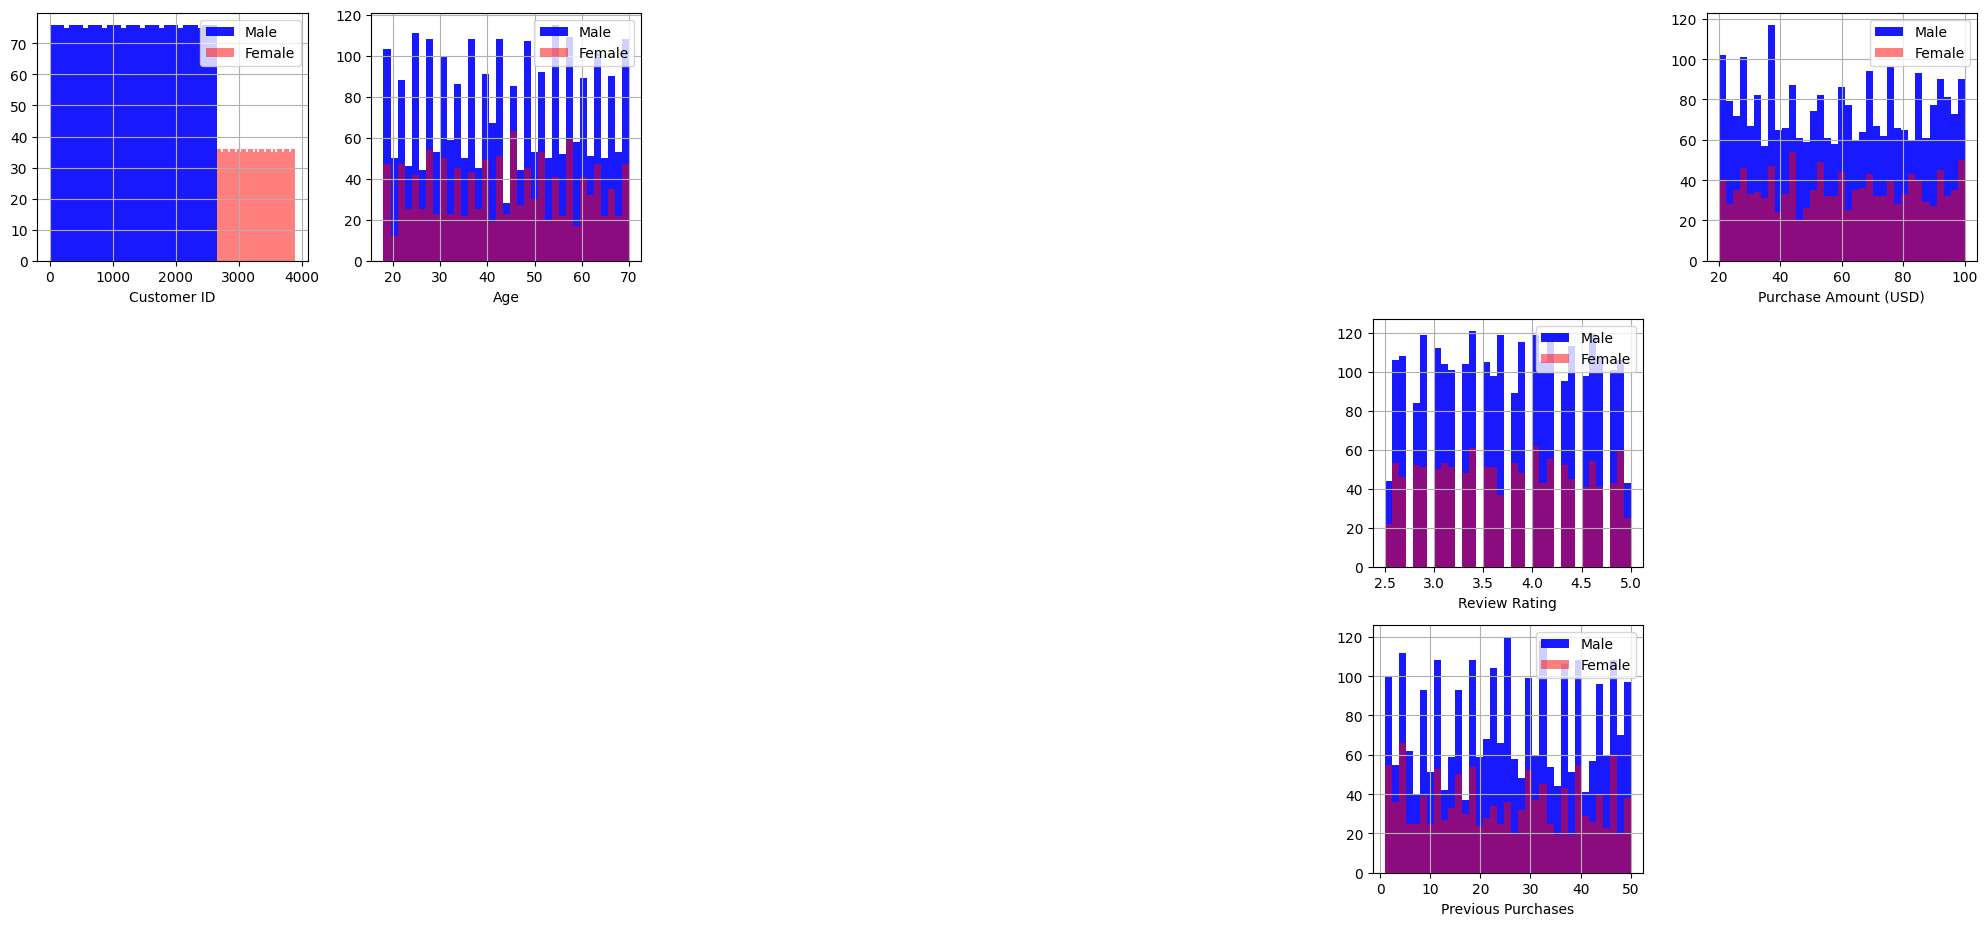

In [22]:
import matplotlib.pyplot as plt

# Assuming the dataset is stored in df
plt.figure(figsize=(20, 12))

# Iterate over each column in the dataset
for i, column in enumerate(df.columns, 1):
    # Skip non-numeric columns or columns that don't make sense for histograms
    if df[column].dtype in ['int64', 'float64']:
        plt.subplot(4, 6, i)  # Create a larger grid of 4x6 for up to 24 plots
        # Plot histogram for males (assuming 'Gender' is the categorical variable)
        df[df['Gender'] == 'Male'][column].hist(bins=35, color='blue', label='Male', alpha=0.9)
        # Plot histogram for females
        df[df['Gender'] == 'Female'][column].hist(bins=35, color='red', label='Female', alpha=0.5)
        
        plt.legend()
        plt.xlabel(column)

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()


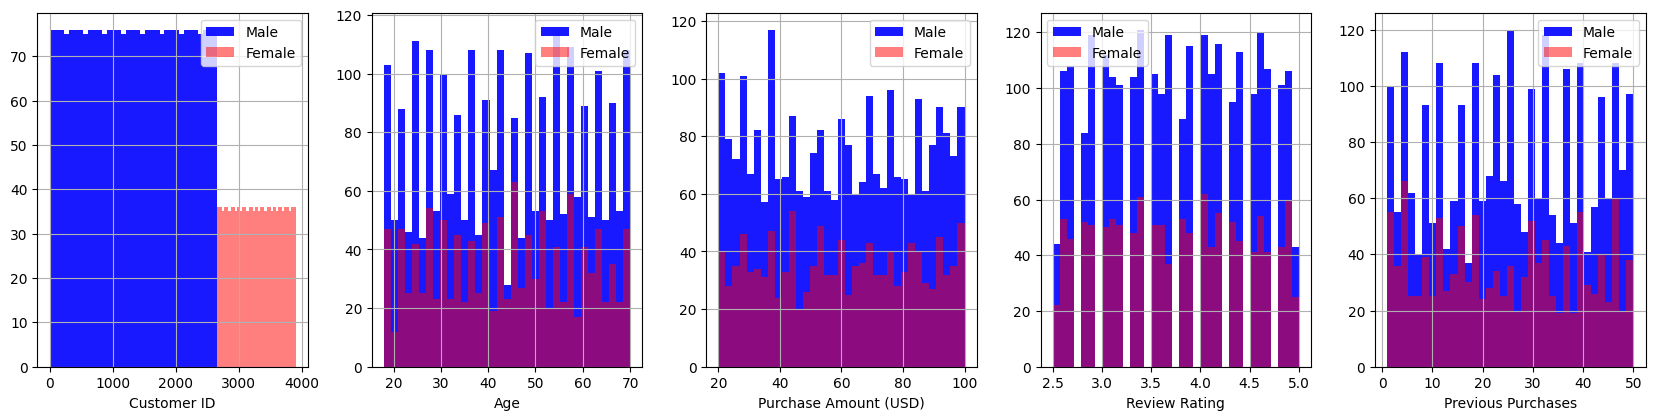

In [23]:
import matplotlib.pyplot as plt

# Assuming the dataset is stored in df
plt.figure(figsize=(20, 8))

# Select a subset of numeric columns (for example, the first 12 columns)
selected_columns = df.select_dtypes(include=['int64', 'float64']).columns[:12]

for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 6, i)  # Create subplots in a 2x6 grid
    df[df['Gender'] == 'Male'][column].hist(bins=35, color='blue', label='Male', alpha=0.9)
    df[df['Gender'] == 'Female'][column].hist(bins=35, color='red', label='Female', alpha=0.5)
    
    plt.legend()
    plt.xlabel(column)

plt.tight_layout()
plt.show()


In [24]:
df


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


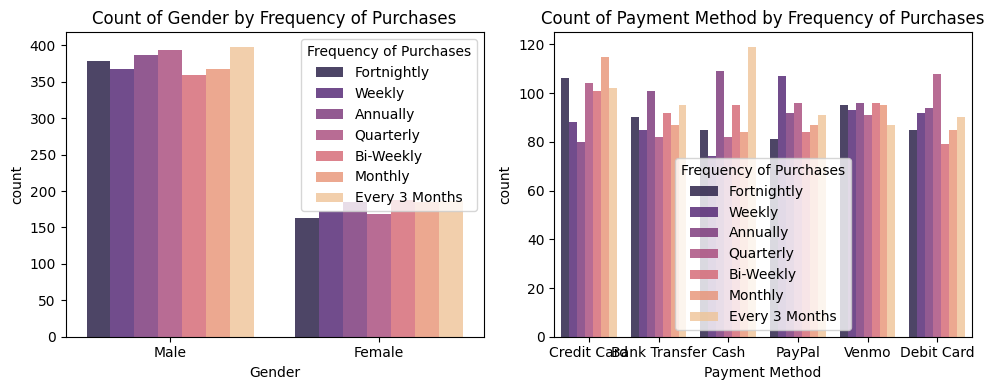

In [25]:
cat = ['Gender', 'Payment Method']

# Create subplots for each category column
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Loop through the columns to create the count plots
for indx, (column, axes) in list(enumerate(list(zip(cat, ax.flatten())))):
    sns.countplot(ax=axes, x=df[column], hue=df['Frequency of Purchases'], palette='magma', alpha=0.8)
    axes.set_title(f'Count of {column} by Frequency of Purchases')

# Hide any unused subplots
if len(cat) < len(ax.flatten()):
    [axes.set_visible(False) for axes in ax.flatten()[len(cat):]]

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


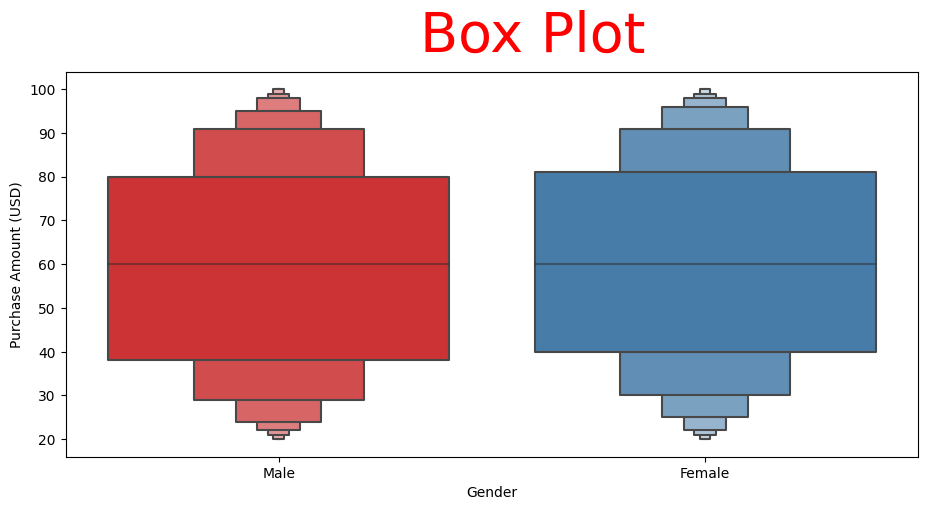

In [26]:
plt.figure(figsize=(11, 5))
plt.gcf().text(0.55, 0.95, "Box Plot", fontsize=40, color='Red', ha='center', va='center')

# Create the boxen plot for 'Gender' vs 'Purchase Amount (USD)'
sns.boxenplot(x=df['Gender'], y=df['Purchase Amount (USD)'], palette="Set1")

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 1100x500 with 0 Axes>

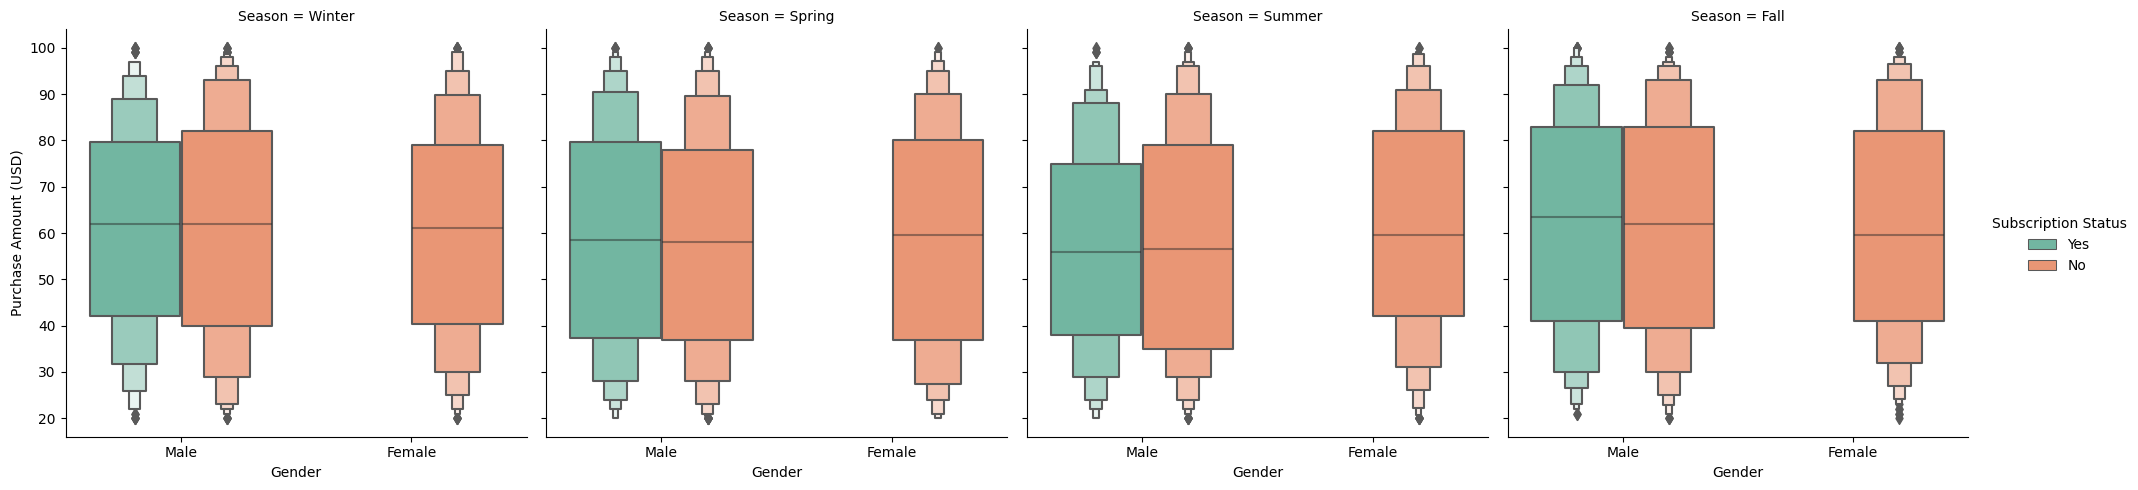

In [27]:
# Set up the plot using `catplot` to facet along 'Season'
plt.figure(figsize=(11, 5))
sns.catplot(x="Gender", y="Purchase Amount (USD)", hue="Subscription Status", 
            col="Season", kind="boxen", palette="Set2", height=5, aspect=1, data=df)

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


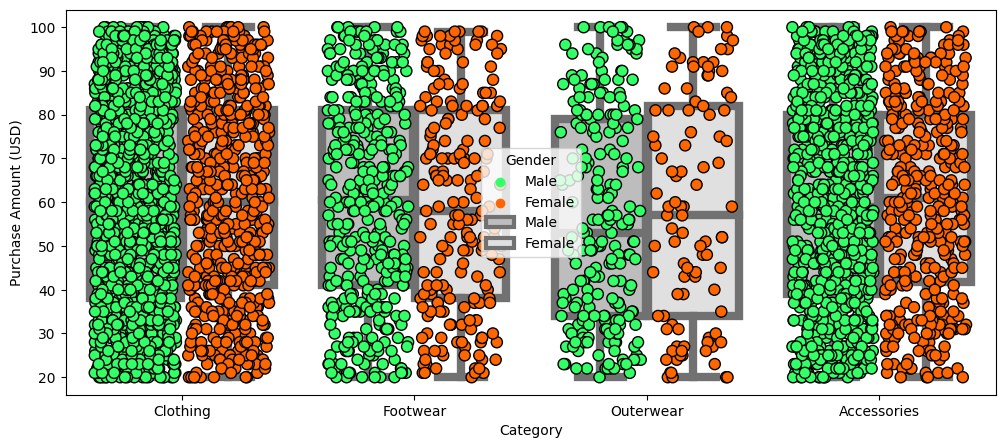

In [28]:
# Set up the plot
plt.figure(figsize=(12, 5))

# Define parameters for stripplot and boxplot
params = dict(data=df, x='Category', y='Purchase Amount (USD)', hue='Gender', dodge=True)

# Create the stripplot
sns.stripplot(**params, size=8, jitter=0.35, palette=['#33FF66', '#FF6600'], edgecolor='black', linewidth=1)

# Create the boxplot
sns.boxplot(**params, palette=['#BDBDBD', '#E0E0E0'], linewidth=6)

# Show the plot
plt.show()

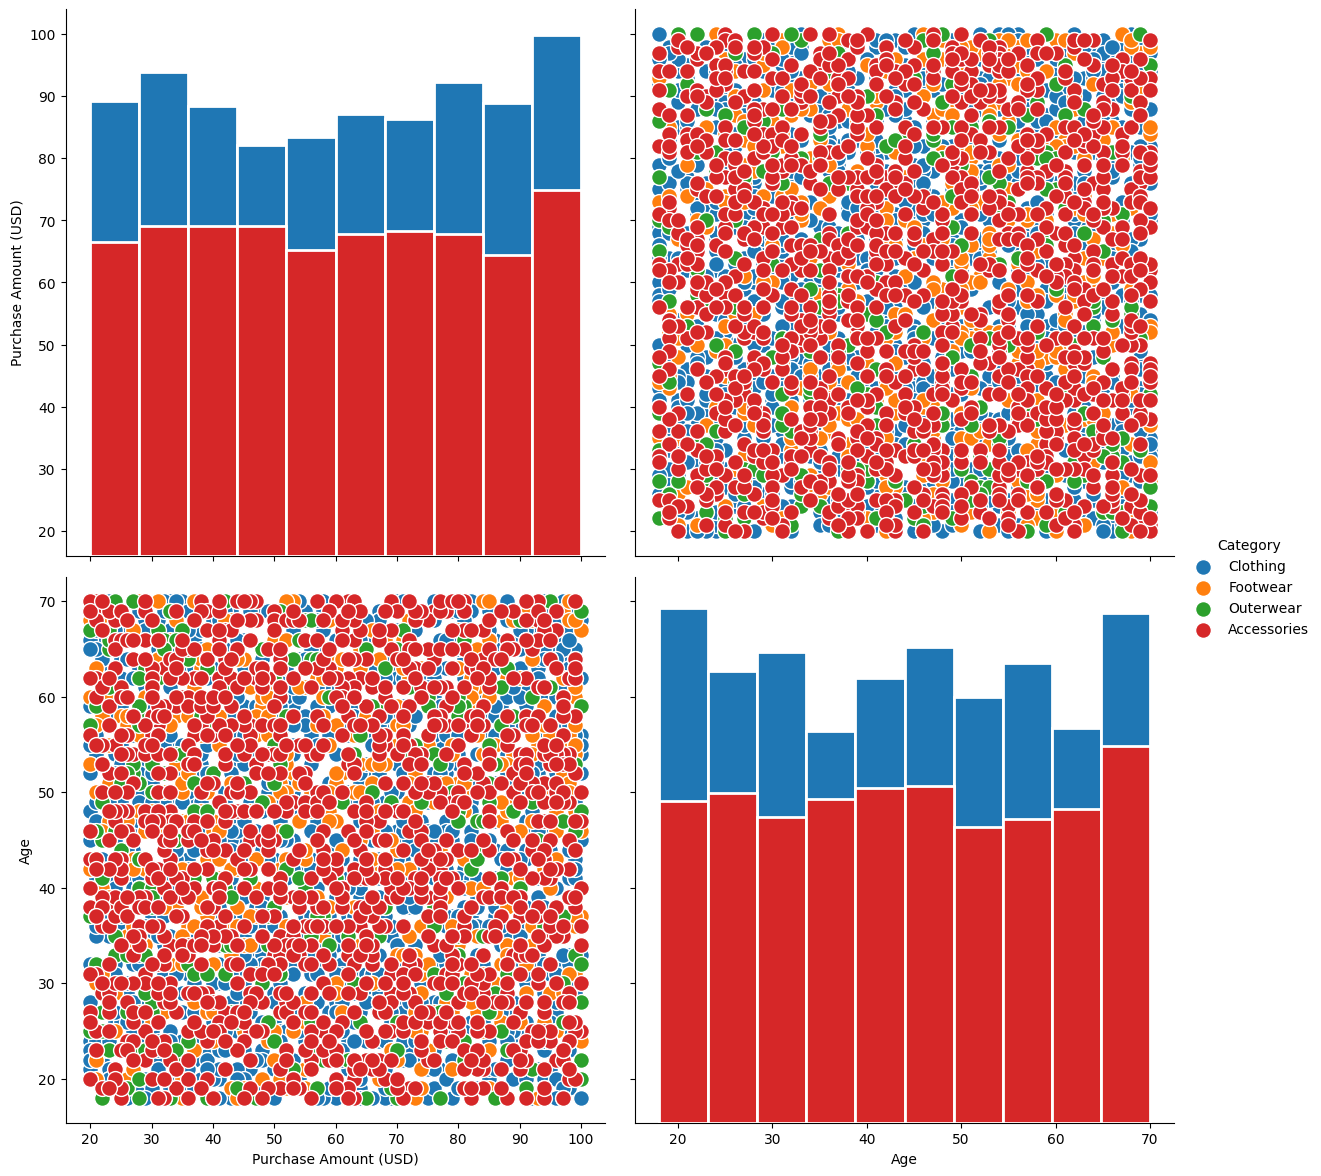

In [29]:
 #Plot a PairGrid with Purchase Amount and Age
g = sns.PairGrid(df, hue='Category', x_vars=["Purchase Amount (USD)", "Age"], y_vars=["Purchase Amount (USD)", "Age"],
                 height=6, aspect=1)

# Scatter plot off-diagonal
g = g.map_offdiag(plt.scatter, edgecolor="w", s=130)

# Histogram diagonal
g = g.map_diag(plt.hist, edgecolor='w', linewidth=2)

# Add legend
g = g.add_legend()

# Show plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


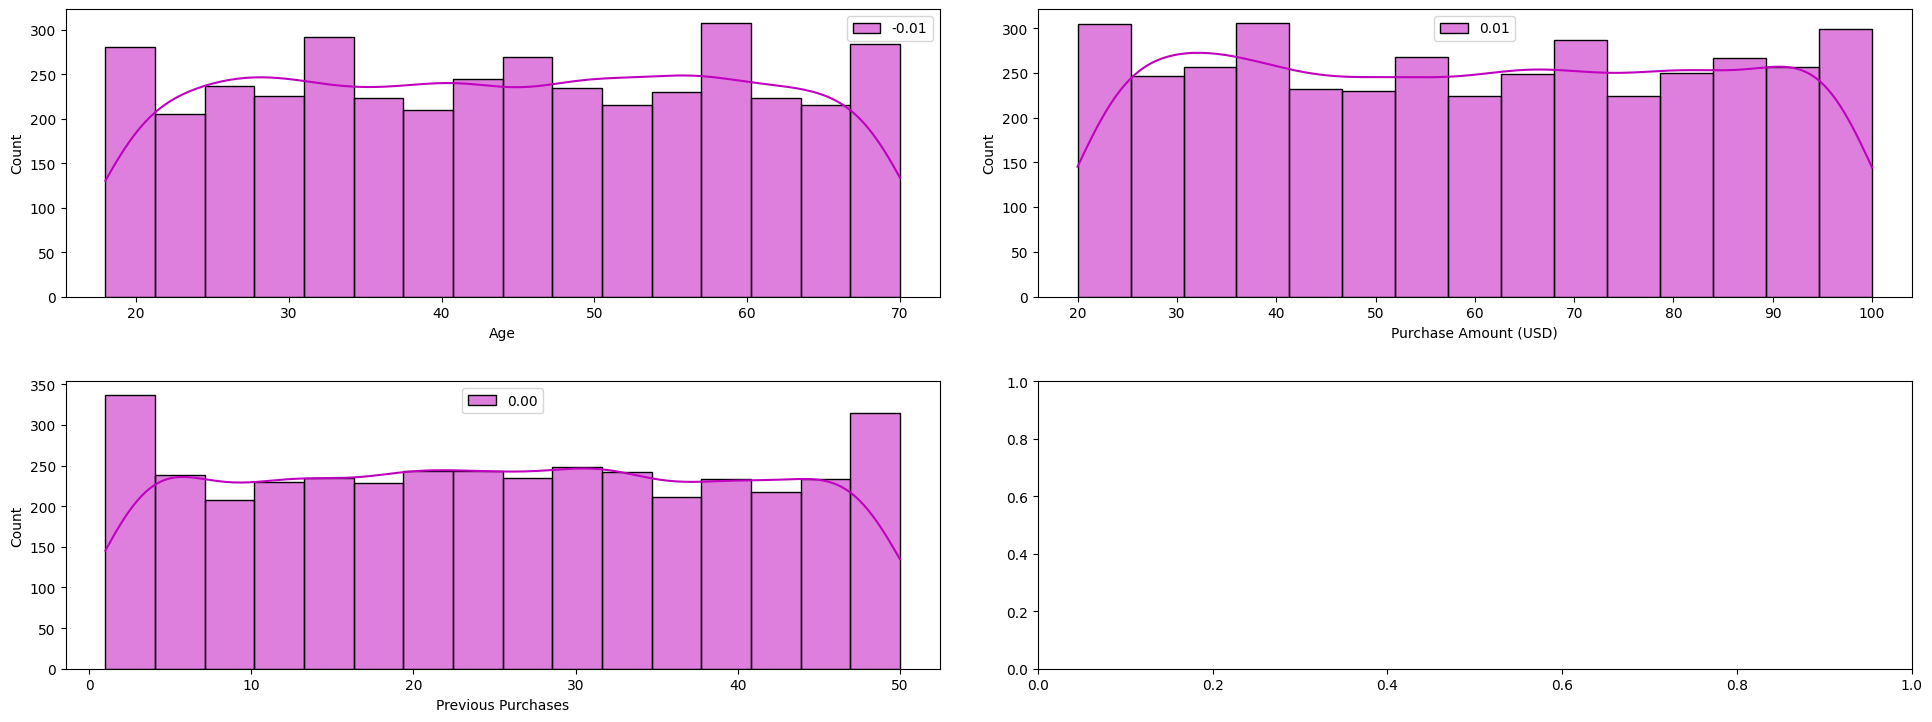

In [30]:
# Select the numeric columns for plotting
features_mean = ['Age', 'Purchase Amount (USD)', 'Previous Purchases']

# Set up the figure for subplots
num_rows, num_cols = 2, 2  # Adjusted for 3 features
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 8))
fig.tight_layout(pad=4.0)

# Plot distributions for each feature
for index, column in enumerate(df[features_mean].columns):
    i, j = (index // num_cols, index % num_cols)
    sns.histplot(df[column], kde=True, color="m", ax=axes[i, j], label="%.2f" % df[column].skew())
    axes[i, j].legend(loc="best")

# Show plot
plt.show()

/tmp/ipykernel_23/1414440679.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Age"][(y == 'Male') & (df["Age"].notnull())], color="Red", shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_23/1414440679.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Age"][(y == 'Female') & (df["Age"].notnull())], ax=g, color="Blue", shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Con

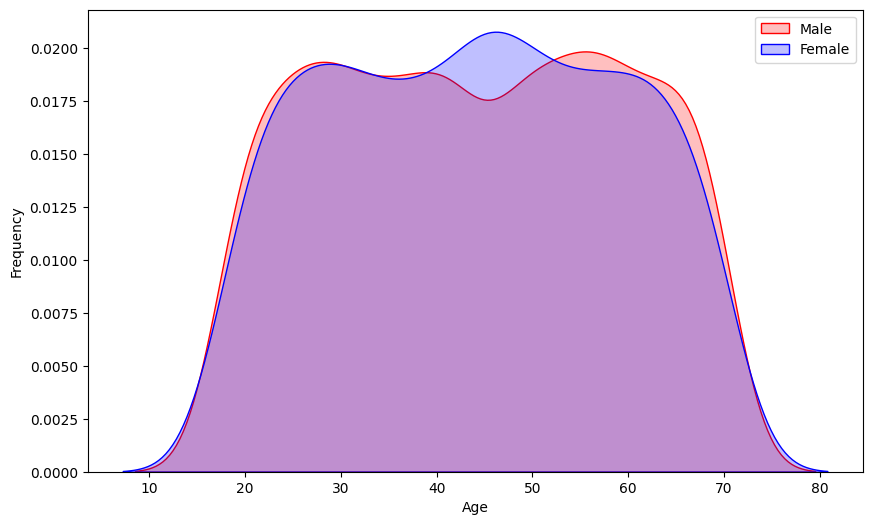

In [31]:
# Gender and Age variables for exploration
y = df['Gender']

# Explore Age distribution
plt.figure(figsize=(10, 6))
g = sns.kdeplot(df["Age"][(y == 'Male') & (df["Age"].notnull())], color="Red", shade=True)
g = sns.kdeplot(df["Age"][(y == 'Female') & (df["Age"].notnull())], ax=g, color="Blue", shade=True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Male", "Female"])

# Show plot
plt.show()

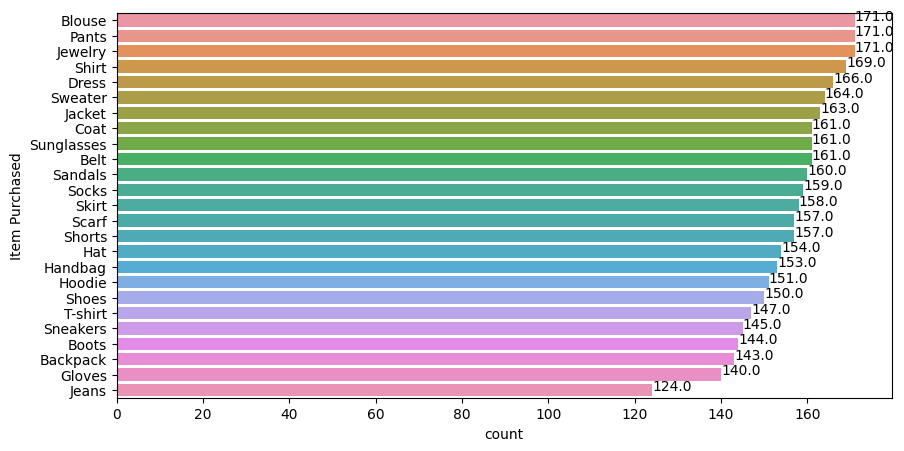

In [32]:
# Function to annotate bars with the value
def barw(ax):
    for p in ax.patches:
        val = p.get_width()  # Height of the bar
        x = p.get_x() + p.get_width()  # x-position
        y = p.get_y() + p.get_height() / 2  # y-position
        ax.annotate(round(val, 2), (x, y))

# Plot a countplot for the 'Item Purchased' column
plt.figure(figsize=(10, 5))
ax0 = sns.countplot(data=df, y='Item Purchased', order=df['Item Purchased'].value_counts().index)
barw(ax0)
plt.show()

<Figure size 1000x700 with 0 Axes>

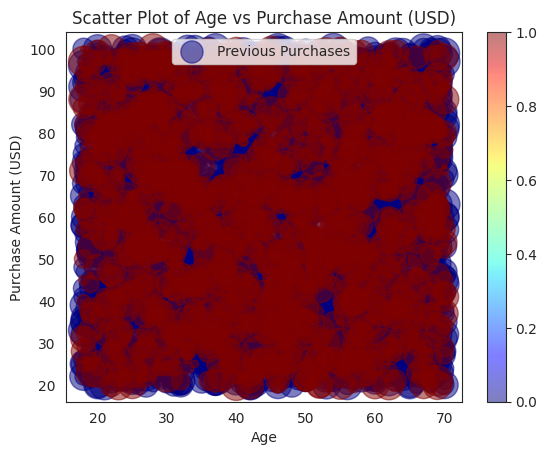

In [33]:
# Set the style to 'white'
sns.set_style('white')

# Plot the scatter plot with customizations
plt.figure(figsize=(10, 7))
scatter = df.plot(kind="scatter", x="Age", y="Purchase Amount (USD)", alpha=0.5,
                  s=df["Previous Purchases"] * 10, label="Previous Purchases", 
                  c=df["Gender"].apply(lambda x: 0 if x == "Male" else 1), cmap=plt.get_cmap("jet"),
                  colorbar=True, sharex=False)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.title("Scatter Plot of Age vs Purchase Amount (USD)")

# Show the plot
plt.show()

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
# Load your dataset
file_path = '/kaggle/input/customer-shopping-latest-trends-dataset/shopping_trends.csv'  # Replace with the correct file path
df = pd.read_csv(file_path)

# Display dataset overview
print(df.head())
print(df.info())


   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo C

In [36]:
# List of categorical columns
categorical_cols = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 
                    'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 
                    'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']

# Use LabelEncoder for encoding
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

print(df.head())


   Customer ID  Age  Gender  Item Purchased  Category  Purchase Amount (USD)  \
0            1   55       1               2         1                     53   
1            2   19       1              23         1                     64   
2            3   50       1              11         1                     73   
3            4   21       1              14         2                     90   
4            5   45       1               2         1                     49   

   Location  Size  Color  Season  Review Rating  Subscription Status  \
0        16     0      7       3            3.1                    1   
1        18     0     12       3            3.1                    1   
2        20     2     12       1            3.1                    1   
3        38     1     12       1            3.5                    1   
4        36     1     21       1            2.7                    1   

   Payment Method  Shipping Type Discount Applied  Promo Code Used  \
0               

In [37]:
# Features (X) and Target (y)
X = df.drop(columns=['Customer ID', 'Subscription Status'])  # Drop ID and target
y = df['Subscription Status']  # Target variable


In [38]:
# Columns that need scaling
numerical_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print(X.head())


        Age  Gender  Item Purchased  Category  Purchase Amount (USD)  \
0  0.718913       1               2         1              -0.285629   
1 -1.648629       1              23         1               0.178852   
2  0.390088       1              11         1               0.558882   
3 -1.517099       1              14         2               1.276716   
4  0.061263       1               2         1              -0.454531   

   Location  Size  Color  Season  Review Rating  Payment Method  \
0        16     0      7       3      -0.907584               2   
1        18     0     12       3      -0.907584               0   
2        20     2     12       1      -0.907584               1   
3        38     1     12       1      -0.349027               4   
4        36     1     21       1      -1.466141               1   

   Shipping Type Discount Applied  Promo Code Used  Previous Purchases  \
0              1              Yes                1           -0.785831   
1              1

In [39]:
# Apply Label Encoding to remaining object-type columns
for col in X.select_dtypes(include='object').columns:
    X[col] = encoder.fit_transform(X[col])


In [40]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


#  Model Creation and Training

In [41]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['Discount Applied']= label_encoder.fit_transform(df['Discount Applied']) 

In [42]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,1,2,1,53,16,0,7,3,3.1,1,2,1,1,1,14,5,3
1,2,19,1,23,1,64,18,0,12,3,3.1,1,0,1,1,1,2,1,3
2,3,50,1,11,1,73,20,2,12,1,3.1,1,1,2,1,1,23,2,6
3,4,21,1,14,2,90,38,1,12,1,3.5,1,4,3,1,1,49,4,6
4,5,45,1,2,1,49,36,1,21,1,2.7,1,1,2,1,1,31,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,0,9,1,28,45,0,21,2,4.2,0,1,0,0,0,32,5,6
3896,3897,52,0,0,0,49,14,0,23,1,4.5,0,4,5,0,0,41,0,1
3897,3898,46,0,1,0,33,29,0,8,1,2.9,0,2,4,0,0,24,5,5
3898,3899,44,0,17,2,77,22,2,3,2,3.8,0,4,1,0,0,24,5,6


#  Model Evaluation

In [43]:
# Create Random Forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


Accuracy Score: 0.841025641025641

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.83      0.88       569
           1       0.65      0.87      0.75       211

    accuracy                           0.84       780
   macro avg       0.80      0.85      0.82       780
weighted avg       0.87      0.84      0.85       780



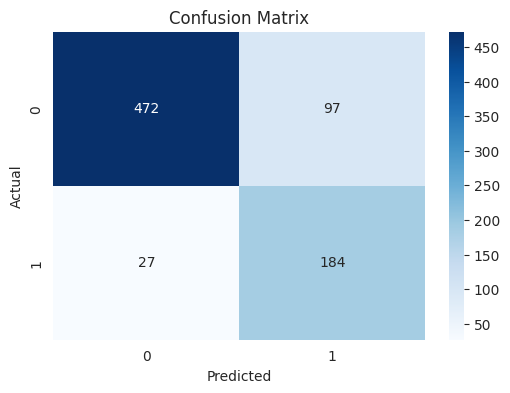

In [44]:
# Evaluate model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Feature Importance

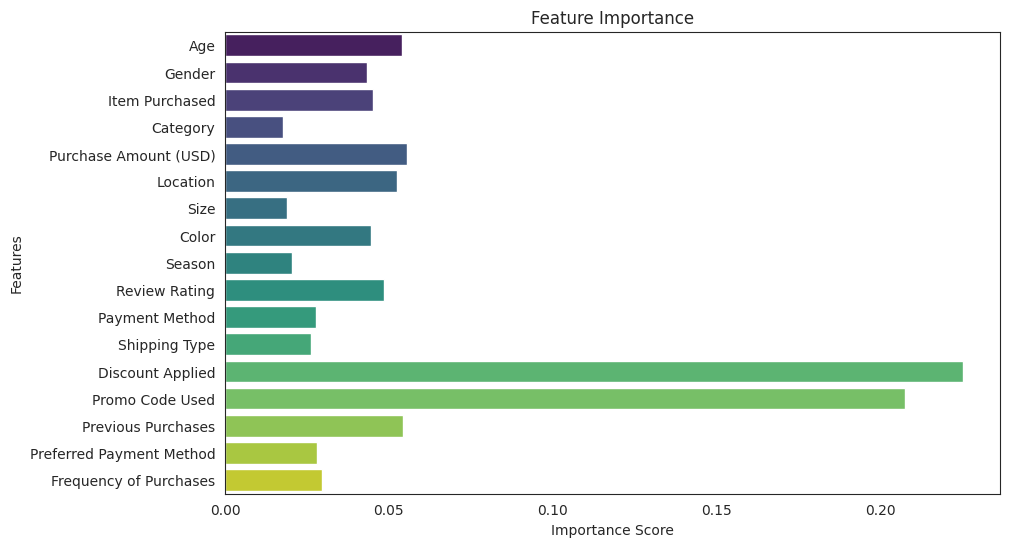

In [45]:
# Plot feature importance
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
